<a href="https://colab.research.google.com/github/Sajrudin/GNCIPL_Internship/blob/main/Week4_CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Customer Segmentation**

Project : Customer Segmentation

Domain : E-Commerce

Presented By : Sajrudin Aalam

# Project Summary
In this project, I will be performing an unsupervised clustering of data on the customer's records from a grocery firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to the distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

# **Project Objective:**
To perform unsupervised clustering on customer records to segment them into meaningful groups.
This segmentation will help the business personalize products, optimize marketing strategies, and enhance customer satisfaction.

# Coding Section

In [16]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/GNCIPL_Internship_Projects/marketing_campaign.xls"
data = pd.read_csv(path, sep='\t')

Mounted at /content/drive


In [3]:
# Creating a copy of the dataset
df = data.copy()

In [4]:
# Displaying first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Shape of the dataset
print(f'Shape of the dataset : {df.shape}')

# Columns of the dataset
print(f'Columns of the dataset : {df.columns}')

Shape of the dataset : (2240, 29)
Columns of the dataset : Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


# Data Column Summary
## 📊 Dataset Dictionary  

The dataset consists of **2240 datapoints** and **29 attributes**.  
It can be categorized into the following sections:  

---

### 1. Customer’s Information  

| Column         | Meaning                                                                 |
|---------------|-------------------------------------------------------------------------|
| **ID**        | Unique identifier for each customer.                                    |
| **Year_Birth** | Year in which the customer was born (used to calculate age).            |
| **Education**  | Education level of the customer (e.g., Basic, Graduation, PhD).         |
| **Marital_Status** | Marital status (e.g., Single, Married, Together, Divorced).         |
| **Income**     | Annual household income of the customer.                                |
| **Kidhome**    | Number of children (under 18 years) living in the customer’s household. |
| **Teenhome**   | Number of teenagers (13–19 years) living in the customer’s household.   |
| **Dt_Customer** | Date when the customer was enrolled with the company (joining date).   |
| **Recency**    | Number of days since the customer’s last purchase (lower = more recent).|
| **Complain**   | `1` if the customer complained in the last 2 years, `0` otherwise.      |

---

### 2. Products (Amount Spent in Last 2 Years)

| Column              | Meaning                                |
|--------------------|----------------------------------------|
| **MntWines**       | Amount spent on wine.                 |
| **MntFruits**      | Amount spent on fruits.               |
| **MntMeatProducts** | Amount spent on meat products.        |
| **MntFishProducts** | Amount spent on fish products.        |
| **MntSweetProducts**| Amount spent on sweets.               |
| **MntGoldProds**   | Amount spent on gold products.         |

---

### 3. Promotion  

| Column             | Meaning                                                          |
|-------------------|------------------------------------------------------------------|
| **NumDealsPurchases** | Number of purchases made with a discount/deal.               |
| **AcceptedCmp1**  | `1` if customer accepted the offer in campaign 1, else `0`.       |
| **AcceptedCmp2**  | `1` if customer accepted the offer in campaign 2, else `0`.       |
| **AcceptedCmp3**  | `1` if customer accepted the offer in campaign 3, else `0`.       |
| **AcceptedCmp4**  | `1` if customer accepted the offer in campaign 4, else `0`.       |
| **AcceptedCmp5**  | `1` if customer accepted the offer in campaign 5, else `0`.       |
| **Response**      | `1` if customer accepted the offer in the most recent campaign.   |

---

### 4. Place (Where Purchases Happened)  

| Column               | Meaning                                         |
|---------------------|-----------------------------------------------|
| **NumWebPurchases** | Number of purchases made through the website. |
| **NumCatalogPurchases** | Number of purchases made using a catalog. |
| **NumStorePurchases** | Number of purchases made in physical stores. |
| **NumWebVisitsMonth** | Number of visits to the company’s website per month. |

---

### 5. Other Columns  

| Column           | Meaning                                                            |
|-----------------|--------------------------------------------------------------------|
| **Z_CostContact** | Constant value (company’s internal cost for contacting customer). |
| **Z_Revenue**   | Constant value (company’s internal revenue metric).                |


In [6]:
# Data Summary
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# Checking Missing values
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [9]:
# Handling the missing values
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [10]:
# Again checking NUll Values
df.isnull().sum().sum()

np.int64(0)

# Feature Engineering

In [11]:
# Creating a Feature which shows for how many days the customer has been a part of the company.

# Convert to datetime with correct format
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

# Convert to date objects
dates = df["Dt_Customer"].dt.date

# Print newest and oldest customer enrollment dates
print("The newest customer's enrolment date in the records:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))

# Create "Customer_For" feature (tenure in days relative to newest customer)
d1 = max(dates)  # newest customer's date
df["Customer_For"] = [(d1 - d).days for d in dates]  # calculate difference in days

# Ensure numeric type
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")


The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,161


In [43]:
curr_date = data['Dt_Customer'].max()
#Age of customer (Taken according to the last date of the purchase available in the data)
df["Age"] = curr_date.year - data["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [44]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,353.582143,45.194196,605.798214,0.950446,2.595089,0.715179
std,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,202.122512,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.750000,37.000000,68.750000,0.000000,2.000000,0.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,355.500000,44.000000,396.000000,1.000000,3.000000,1.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,55.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,121.000000,2525.000000,3.000000,5.000000,1.000000


In [45]:
# Selecting features
to_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

print("Relative Plot Of Some Selected Features: A Data Subset")

# Creating an interactive scatter matrix
fig = px.scatter_matrix(
    df[to_plot],
    dimensions=["Income", "Recency", "Customer_For", "Age", "Spent"],  # numeric cols
    color="Is_Parent",  # categorical hue
    color_discrete_map={0: "#682F2F", 1: "#F3AB60"},  # custom palette
    title="Interactive Scatter Matrix of Selected Features"
)

# Updating styling
fig.update_traces(diagonal_visible=False, marker=dict(size=6, opacity=0.7))
fig.update_layout(
    dragmode="select",
    width=900,
    height=900,
    plot_bgcolor="#FFE9ED",
    paper_bgcolor="#FEF9ED"
)

fig.show()


Relative Plot Of Some Selected Features: A Data Subset


In [48]:
#Dropping the outliers by setting a cap on Age and income.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<250000)]

print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


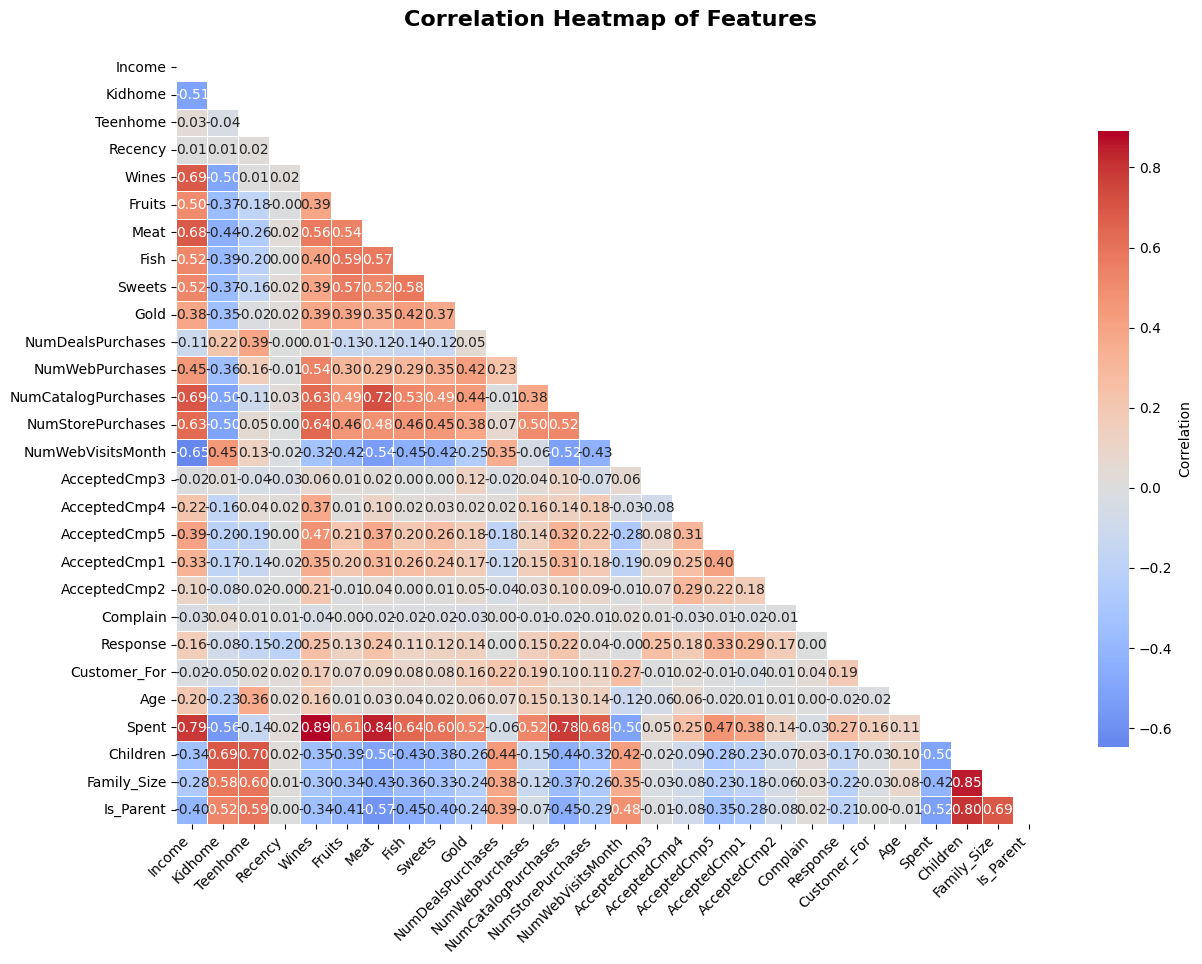

In [52]:
# Compute correlation matrix
corrmat = df.corr(numeric_only=True)

# Mask upper triangle for clarity
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(
    corrmat,
    mask=mask,
    cmap='coolwarm',      # your custom palette
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)

plt.title("Correlation Heatmap of Features", fontsize=16, weight="bold", pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


# Data Preprocessing

In [53]:
#List of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [54]:
# Label Encoding the object datatypes
for col in object_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [55]:
# Scaling the numeric data
# Copy and drop unwanted columns in one step
cols_to_drop = [
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'
]
ds = df.drop(columns=cols_to_drop).copy()

# Scale features
scaler = StandardScaler()
scaled_ds = pd.DataFrame(
    scaler.fit_transform(ds),
    columns=ds.columns,
    index=ds.index  # keep same index for alignment
)

print(" Features scaled successfully!")
scaled_ds.head()

 Features scaled successfully!


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.89438,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,2.509801,-0.552429,0.692865,1.529793,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362
1,-0.89438,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-0.568970,-1.167738,-0.131421,-1.191143,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169
2,-0.89438,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,-0.226884,1.293496,-0.543564,-0.206659,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362
3,-0.89438,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.911056,-0.552429,0.280722,-1.062517,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169
4,0.57070,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,0.115201,0.062879,-0.131421,-0.953679,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169


# Dimensionality Reduction

In [65]:
!pip install kneed

In [66]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from kneed import KneeLocator

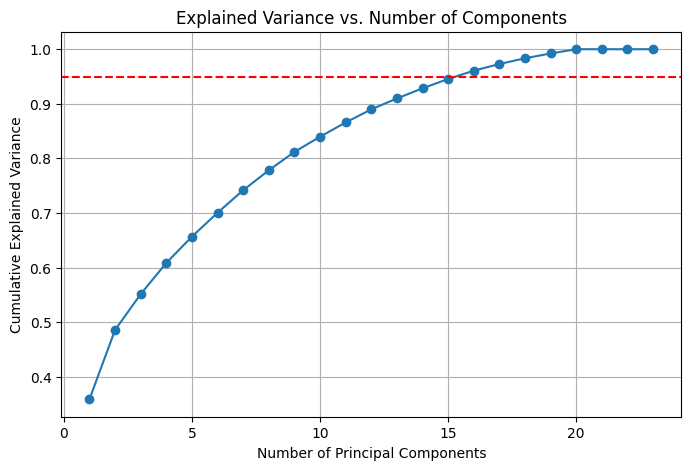

Optimal number of components: 16


In [58]:
# Fit PCA without specifying components first
pca = PCA()
pca.fit(scaled_ds)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance line
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

# Find number of components for 95% variance
optimal_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"Optimal number of components: {optimal_components}")

In [59]:
# Apply PCA with optimal components
pca = PCA(n_components=16)
pca_ds = pca.fit_transform(scaled_ds)

# Create DataFrame with new features (PCs)
pca_df = pd.DataFrame(
    pca_ds,
    columns=[f"PC{i+1}" for i in range(16)],
    index=scaled_ds.index
)

print("Data projected onto 16 principal components")
pca_df.head()

Data projected onto 16 principal components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,4.983482,-0.146109,2.429971,-0.267460,-1.061198,0.459998,-0.466842,-0.779788,1.791812,0.831843,-1.034063,-0.663775,0.884382,1.188347,0.878027,0.141388
1,-2.862810,0.024148,-1.553992,-1.384705,-1.705266,-0.610681,-0.022773,0.075080,0.966027,0.400103,-0.096681,-0.480487,0.073948,-0.005902,-0.061076,-0.100305
2,2.622319,-0.735044,-0.258797,-0.004815,0.628949,-0.563175,-1.632357,-0.065416,-0.705260,-0.517379,-1.007892,-0.184208,-0.937934,-0.489747,0.683014,1.002539
3,-2.641793,-1.456476,-0.348691,1.320098,-0.348959,-0.876980,-0.735360,0.808861,-0.690045,-0.042509,-0.375955,0.133656,-0.202658,-0.130697,0.171132,-0.130696
4,-0.646203,0.174540,-0.115754,1.636826,-0.301472,0.928038,1.442241,0.443818,-1.022697,0.369757,-1.324750,0.589873,-0.235637,0.011890,-0.060291,0.554614


In [60]:
pca_df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
count,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2236.000000,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03
mean,-6.991029e-17,1.080432e-16,-3.574958e-18,8.738786e-17,1.747757e-17,1.946366e-17,6.355481e-18,7.944351e-18,4.925497e-17,0.000000,1.668314e-17,-4.051619e-17,-4.369393e-18,-3.813288e-17,-9.136003e-18,6.355481e-18
std,2.873151e+00,1.709086e+00,1.229371e+00,1.146543e+00,1.052631e+00,1.003502e+00,9.743706e-01,9.161565e-01,8.810479e-01,0.799809,7.742346e-01,7.450249e-01,6.767336e-01,6.546974e-01,6.269546e-01,5.909003e-01
min,-5.973214e+00,-4.195209e+00,-3.587621e+00,-3.133052e+00,-3.036419e+00,-2.503151e+00,-3.298057e+00,-4.148108e+00,-5.476031e+00,-2.582857,-5.049669e+00,-4.196902e+00,-2.975444e+00,-3.328578e+00,-2.804857e+00,-3.360737e+00
25%,-2.528951e+00,-1.323151e+00,-8.399408e-01,-7.587597e-01,-7.082981e-01,-8.106777e-01,-7.065212e-01,-4.967130e-01,-5.612053e-01,-0.472245,-4.828216e-01,-4.340577e-01,-2.452219e-01,-3.419843e-01,-2.034668e-01,-2.499149e-01
50%,-7.823144e-01,-1.752159e-01,-6.930746e-02,-1.180865e-02,-6.337050e-03,-8.893962e-03,-3.970549e-02,5.275957e-02,-1.132949e-02,-0.043973,6.643046e-03,-3.238430e-02,-1.557209e-02,-1.429944e-02,-2.967799e-03,6.608604e-03
75%,2.383640e+00,1.238311e+00,8.693175e-01,8.948239e-01,7.377552e-01,8.179094e-01,6.474538e-01,5.193681e-01,5.593662e-01,0.399447,4.813677e-01,4.513015e-01,2.769269e-01,3.304774e-01,1.755280e-01,3.068434e-01
max,7.457813e+00,6.139789e+00,6.688666e+00,3.365377e+00,3.003658e+00,2.242712e+00,3.708297e+00,5.496697e+00,5.638534e+00,6.145625,2.847519e+00,5.772321e+00,6.295981e+00,2.646463e+00,3.345481e+00,4.112373e+00


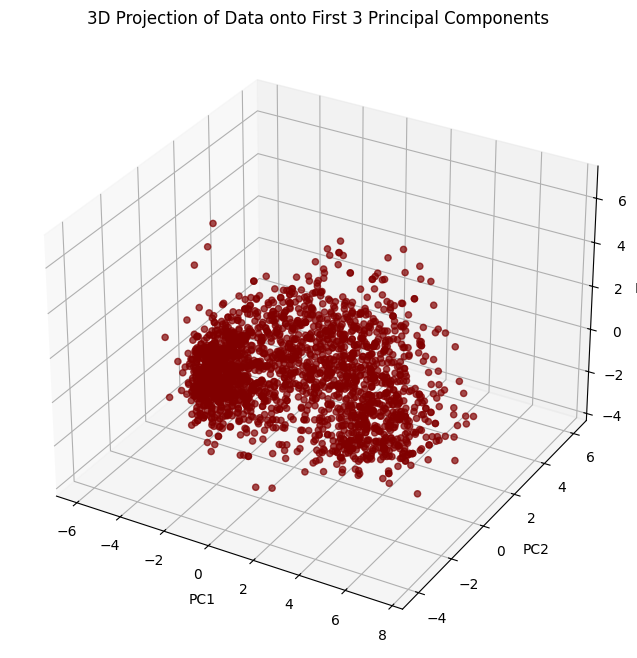

In [61]:
# Choosing first 3 principal components
x = pca_df["PC1"]
y = pca_df["PC2"]
z = pca_df["PC3"]

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(x, y, z, c="maroon", marker="o", alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D Projection of Data onto First 3 Principal Components")

plt.show()

# Clustering & Insights From the Clusters

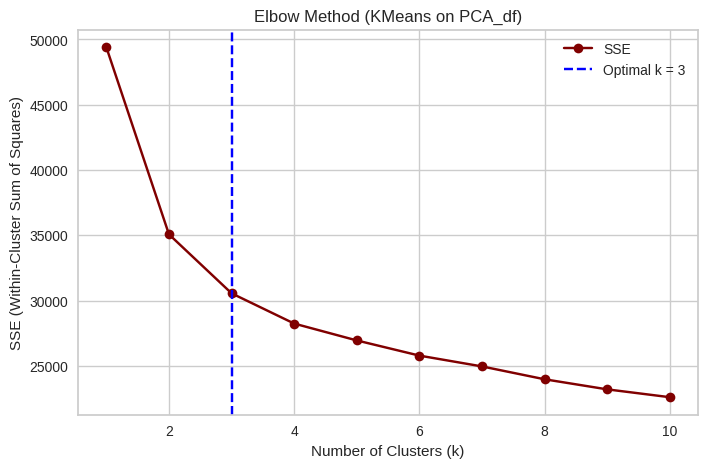

Optimal number of clusters: 3


In [67]:
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)

# Find the "elbow" point
knee = KneeLocator(k_values, sse, curve="convex", direction="decreasing")
optimal_k = knee.knee

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='-', color='maroon', label="SSE")
plt.axvline(x=optimal_k, color="blue", linestyle="--", label=f"Optimal k = {optimal_k}")
plt.title("Elbow Method (KMeans on PCA_df)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Within-Cluster Sum of Squares)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of clusters: {optimal_k}")

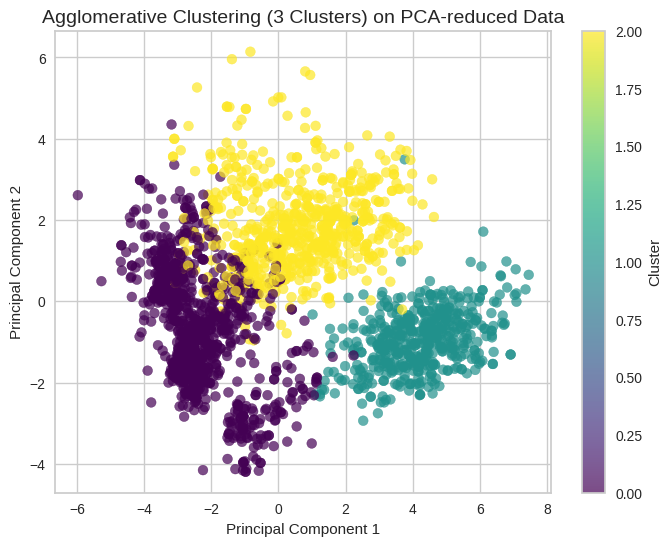

In [68]:
# Fit Agglomerative Clustering with 3 clusters
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters = agg.fit_predict(pca_df)

# Add cluster labels to your PCA dataframe
pca_df["Cluster"] = clusters

# Plot first two principal components with cluster coloring
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df["PC1"], pca_df["PC2"],
    c=pca_df["Cluster"], cmap="viridis", s=50, alpha=0.7
)
plt.title("Agglomerative Clustering (3 Clusters) on PCA-reduced Data", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [74]:
df['Cluster'] = clusters

In [69]:
# Create a DataFrame for plotting cluster counts
cluster_counts = pca_df["Cluster"].value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Count"]

# Interactive count plot using Plotly
fig = px.bar(
    cluster_counts,
    x="Cluster",
    y="Count",
    color="Cluster",
    text="Count",
    color_discrete_sequence=["#682F2F","#B9C0C9","#F3AB60"],
    title="Distribution of Clusters (Agglomerative Clustering, 3 clusters)"
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title="Cluster", yaxis_title="Count", uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [77]:
fig = px.box(
    df,
    x="Cluster",
    y="Spent",
    points="all",
    color="Cluster",
    color_discrete_sequence=["#682F2F","#B9C0C9","#F3AB60"],
    title="Spent Distribution Across Clusters"
)

fig.update_traces(jitter=0.3, marker=dict(size=5, opacity=0.6))
fig.update_layout(
    xaxis_title="Cluster",
    yaxis_title="Spent",
    boxmode="group"
)

fig.show()


In [78]:
df["Total_Promos"] = (
    df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] +
    df["AcceptedCmp4"] + df["AcceptedCmp5"]
)

# Interactive bar plot for total promotions accepted per cluster
fig = px.histogram(
    df,
    x="Total_Promos",
    color="Cluster",  # matches your cluster column
    barmode="group",
    color_discrete_sequence=["#682F2F","#B9C0C9","#F3AB60"],
    title="Count of Total Promotions Accepted by Cluster",
    text_auto=True
)

fig.update_layout(
    xaxis_title="Number of Total Accepted Promotions",
    yaxis_title="Count",
    bargap=0.2
)
fig.show()

# Evaluation using Silhouette Score

The Silhouette Score is a great metric for evaluating clustering quality. It measures how similar each point is to its own cluster compared to other clusters. The score ranges from -1 to 1:

* +1: Data points are well-matched to their own cluster and poorly matched to neighboring clusters (good clustering).

* 0: Points are on or very close to the decision boundary between clusters.

* -1: Points are likely assigned to the wrong cluster.

In [79]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_df.drop(columns="Cluster"), pca_df["Cluster"])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.211
